In [1]:
# import stuff
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from collections import Counter

In [7]:
pokemon = pd.read_csv('data/pokemon.csv', header = None, 
                     skiprows=1, encoding = 'latin-1', low_memory = False,
                    names = ['Name', 'Version', 'Primary Type' ,'Secondary Type','Stage', 'Attack', 'Defense' , 'HP', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total']
)

In [8]:
pokemon

,Name,Version,Primary Type,Secondary Type,Stage,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,1,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,2,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,3,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,3,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,1,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,NaN,ICE,NaN,1,145,130,100,65,110,30,580
1041,Spectrier,NaN,GHOST,NaN,1,65,60,100,145,80,130,580
1042,Calyrex,NaN,PSYCHIC,GRASS,1,80,80,100,80,80,80,500
1043,Calyrex,Ice Rider,PSYCHIC,ICE,2,165,150,100,85,130,50,680


In [56]:
noMega = pokemon[pokemon['Version'].isnull()]
noMega

,Name,Version,Primary Type,Secondary Type,Stage,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,1,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,2,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,3,82,83,80,100,100,80,525
4,Charmander,NaN,FIRE,NaN,1,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,2,64,58,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,Regieleki,NaN,ELECTRIC,NaN,1,100,50,80,100,50,200,580
1039,Regidrago,NaN,DRAGON,NaN,1,100,50,200,100,50,80,580
1040,Glastrier,NaN,ICE,NaN,1,145,130,100,65,110,30,580
1041,Spectrier,NaN,GHOST,NaN,1,65,60,100,145,80,130,580


In [19]:
# Class with internal parameter k and methods train and predict
class KNN:
    def __init__(self, k):
        self.k = k
        
    # i.The train method should take in an array of pre-labeled data and store them to be used in the kNN calculation later.
    # training the algorithm based on already found data
    def train(self, knn_set, labels):
        self.knn_set = knn_set
        self.labels = labels
        
    # ii. The predict method should take in a single data point (of the same dimension as those used in training) 
    # and return the label of the kNN decision. Keep in mind that, in general, you may have to choose between multiple labels. 
    # In this case, ties are possible, but you can just decide to break them randomly or increase k to get more votes
    # send in a test point for it to be classified
    def predict(self, x):
        # need to find k closest neighbors to the point w the Euclidean norm
        # pair up each distance with the label of its point
        distances = [ (norm(x - self.knn_set[i]), self.labels[i]) for i in range(len(self.knn_set))]
        #print('Distances: ', distances)
        
        # order all the distances
        k_nearest = sorted(distances)
        k_nearest = k_nearest[:self.k]
        #print('k_nearest: ', distances)
        
        # determine the labels of the top k points & do majority vote
        return Counter([p[1] for p in k_nearest])
 

In [5]:
def norm(x):
    return np.sqrt(np.sum(x**2))

In [57]:
#Pokemon data using HP and Total 
# Total > 599
# HP > 79.99

k = 3
knn = KNN(3)

knn_set = noMega[['HP', 'Total']].to_numpy()
labels = noMega['Stage'].values 

knn.train(knn_set, labels)

random_pokemon = [70,550]
pred = knn.predict(random_pokemon)


print(f'The predicted stage of {random_pokemon} is ~> Stage {pred.most_common(1)[0][0]}')



The predicted stage of [70, 550] is ~> Stage 3


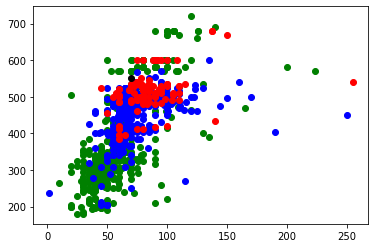

In [58]:
# SPLIT INTO OUR THREE STAGES 
stage_one = noMega[noMega['Stage'] == 1]
stage_two = noMega[noMega['Stage'] == 2]
stage_three = noMega[noMega['Stage'] == 3]

#PLOTTING
plt.scatter(x = stage_one['HP'], y = stage_one['Total'], color = 'g')
plt.scatter(x = stage_two['HP'], y = stage_two['Total'], color = 'b')
plt.scatter(x = stage_three['HP'], y = stage_three['Total'], color = 'r')
plt.scatter(x = random_pokemon[0], y = random_pokemon[1], color = 'black')

In [59]:
 new = noMega[['Total' , 'Stage']]

one = new[new['Stage'] == 1]
two = new[new['Stage'] == 2]
three = new[new['Stage'] == 3]

print(one['Total'].mean())
print(two['Total'].mean())
print(three['Total'].mean())

377.36160714285717
446.9516129032258
515.0357142857143
